# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agadez
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | tirumakudal narsipur
Processing Record 8 of Set 1 | qamdo
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | salekhard
Processing Record 21 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agadez,19.7500,10.2500,29.21,8,0,5.26,NE,1717982882
1,grytviken,-54.2811,-36.5092,-7.11,77,22,5.18,GS,1717982882
2,puerto natales,-51.7236,-72.4875,1.41,99,100,2.33,CL,1717982882
3,blackmans bay,-43.0167,147.3167,10.20,62,5,1.79,AU,1717982883
4,west island,-12.1568,96.8225,27.99,83,40,3.60,CC,1717982827


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agadez,19.7500,10.2500,29.21,8,0,5.26,NE,1717982882
1,grytviken,-54.2811,-36.5092,-7.11,77,22,5.18,GS,1717982882
2,puerto natales,-51.7236,-72.4875,1.41,99,100,2.33,CL,1717982882
3,blackmans bay,-43.0167,147.3167,10.20,62,5,1.79,AU,1717982883
4,west island,-12.1568,96.8225,27.99,83,40,3.60,CC,1717982827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

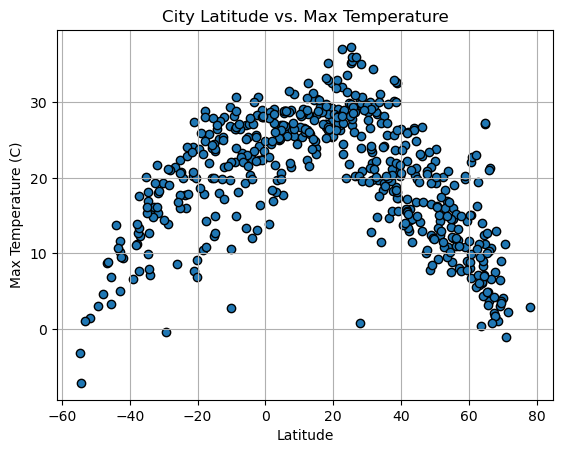

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure

plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

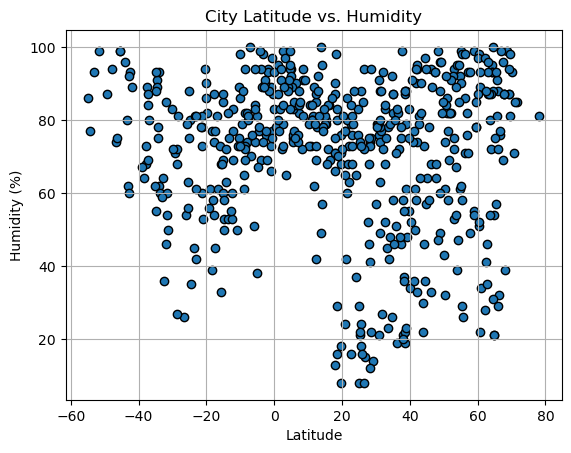

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

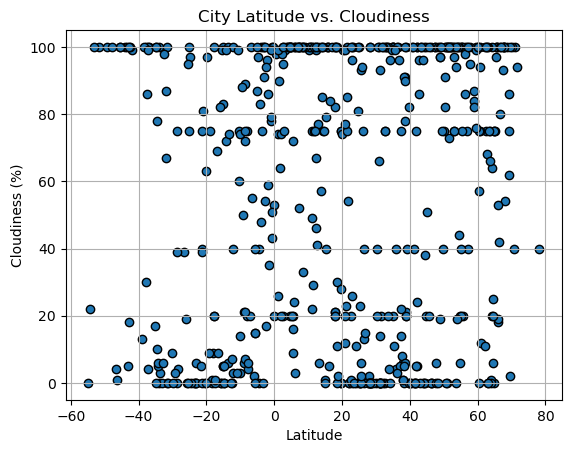

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

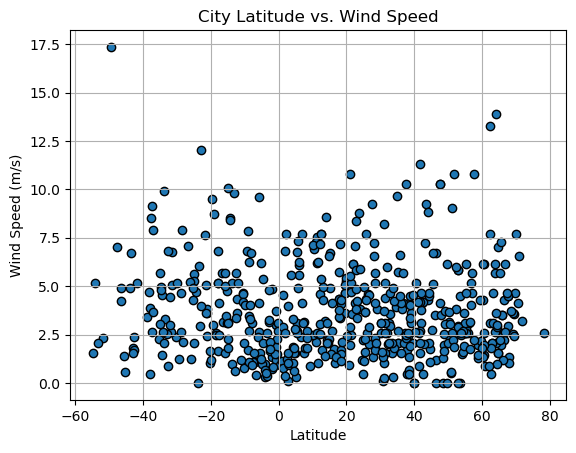

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linreg(x, y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    result = linregress(x, y)
    plt.plot(x, result.intercept + result.slope*x, 'r')
    plt.annotate("y = {result.slope}x + {result.intercept}", xy =(100, 100))
    plt.show()
    return(f"The r-value is: {result.rvalue}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agadez,19.7500,10.2500,29.21,8,0,5.26,NE,1717982882
6,tirumakudal narsipur,12.2100,76.9064,22.35,85,67,4.62,IN,1717982883
7,qamdo,31.1667,97.2333,12.87,49,14,1.03,CN,1717982883
8,enewetak,11.3474,162.3373,28.43,81,29,7.28,MH,1717982883
9,broome,42.2506,-75.8330,12.92,94,100,4.12,US,1717982637


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-7.11,77,22,5.18,GS,1717982882
2,puerto natales,-51.7236,-72.4875,1.41,99,100,2.33,CL,1717982882
3,blackmans bay,-43.0167,147.3167,10.20,62,5,1.79,AU,1717982883
4,west island,-12.1568,96.8225,27.99,83,40,3.60,CC,1717982827
5,port-aux-francais,-49.3500,70.2167,3.08,87,100,17.36,TF,1717982883


###  Temperature vs. Latitude Linear Regression Plot

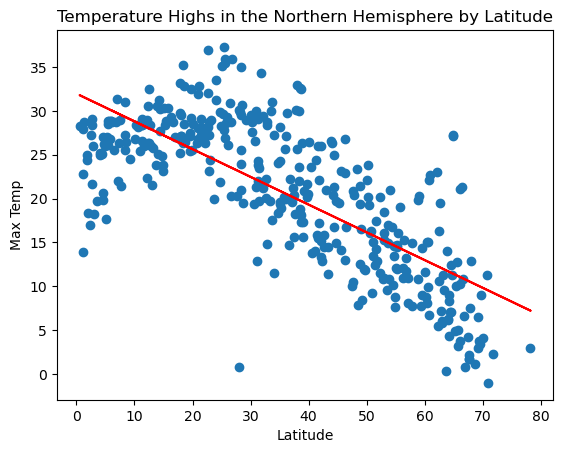

'The r-value is: -0.7486140074033046'

In [21]:
# Linear regression on Northern Hemisphere
linreg(northern_df["Lat"], northern_df["Max Temp"], "Temperature Highs in the Northern Hemisphere by Latitude", "Latitude", "Max Temp")


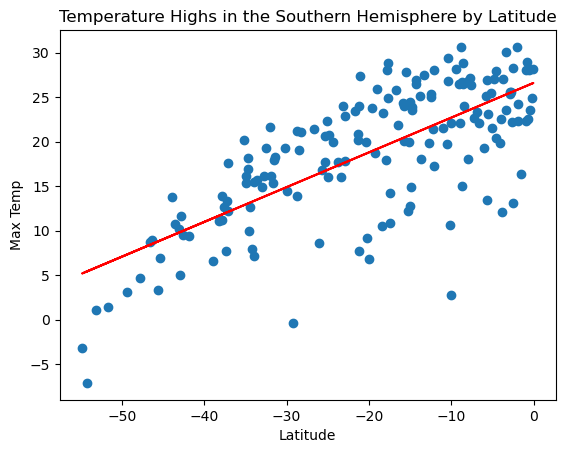

'The r-value is: 0.72876852163725'

In [22]:
# Linear regression on Southern Hemisphere
linreg(southern_df["Lat"], southern_df["Max Temp"], "Temperature Highs in the Southern Hemisphere by Latitude", "Latitude", "Max Temp")

**Discussion about the linear relationship:** 

For Northern hemisphere, we can see that the calculated 'r' vaule is negative. It implies that as the latitude increases the temperature decreases. It is persistent as we know that, furthur away from the equator towards northen pole, it gets colder approaching the artic region.
    
Similarly, for the Southern hemisphere, we can see that the calculated 'r' value is positive.This means that as the latitude increases the  temperature tends to increase as well.


### Humidity vs. Latitude Linear Regression Plot

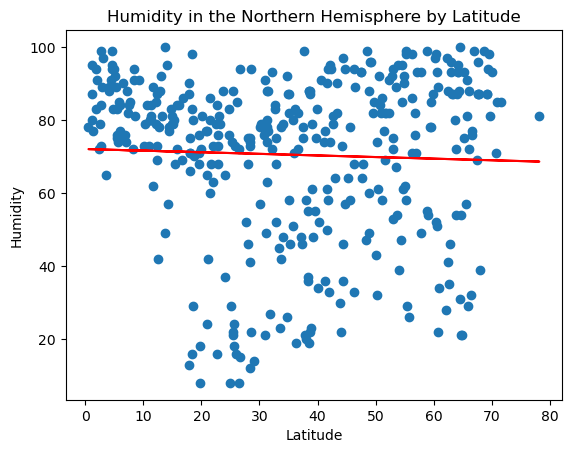

'The r-value is: -0.038388051532153085'

In [26]:
# Northern Hemisphere
linreg(northern_df ["Lat"], northern_df["Humidity"], "Humidity in the Northern Hemisphere by Latitude", "Latitude", "Humidity")

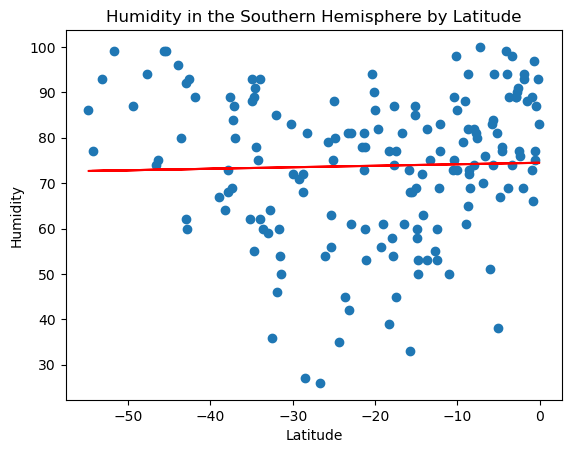

'The r-value is: 0.029391703828608746'

In [27]:
# Southern Hemisphere
linreg(southern_df["Lat"], southern_df["Humidity"], "Humidity in the Southern Hemisphere by Latitude", "Latitude", "Humidity")


**Discussion about the linear relationship:** 
The calculated r value for both the data sets are closer towards zero. It suggest that, the relation of humidity with latitude is minimal. There are other factors beside latitude that have significant impact on the humidity of the geographical location. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE